In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [12]:
df = pd.read_csv("Social_Network_Ads.csv")

In [13]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [14]:
df.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [15]:
df.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [18]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

In [21]:
for i in df:
    if(df[i].dtypes == 'object') :
        df[i] = labelencoder.fit_transform(df[i])

In [22]:
df.dtypes

User ID            int64
Gender             int32
Age                int64
EstimatedSalary    int64
Purchased          int64
dtype: object

In [24]:
correlation = df.corr().abs()
print(correlation)

                  User ID    Gender       Age  EstimatedSalary  Purchased
User ID          1.000000  0.025249  0.000721         0.071097   0.007120
Gender           0.025249  1.000000  0.073741         0.060435   0.042469
Age              0.000721  0.073741  1.000000         0.155238   0.622454
EstimatedSalary  0.071097  0.060435  0.155238         1.000000   0.362083
Purchased        0.007120  0.042469  0.622454         0.362083   1.000000


[]

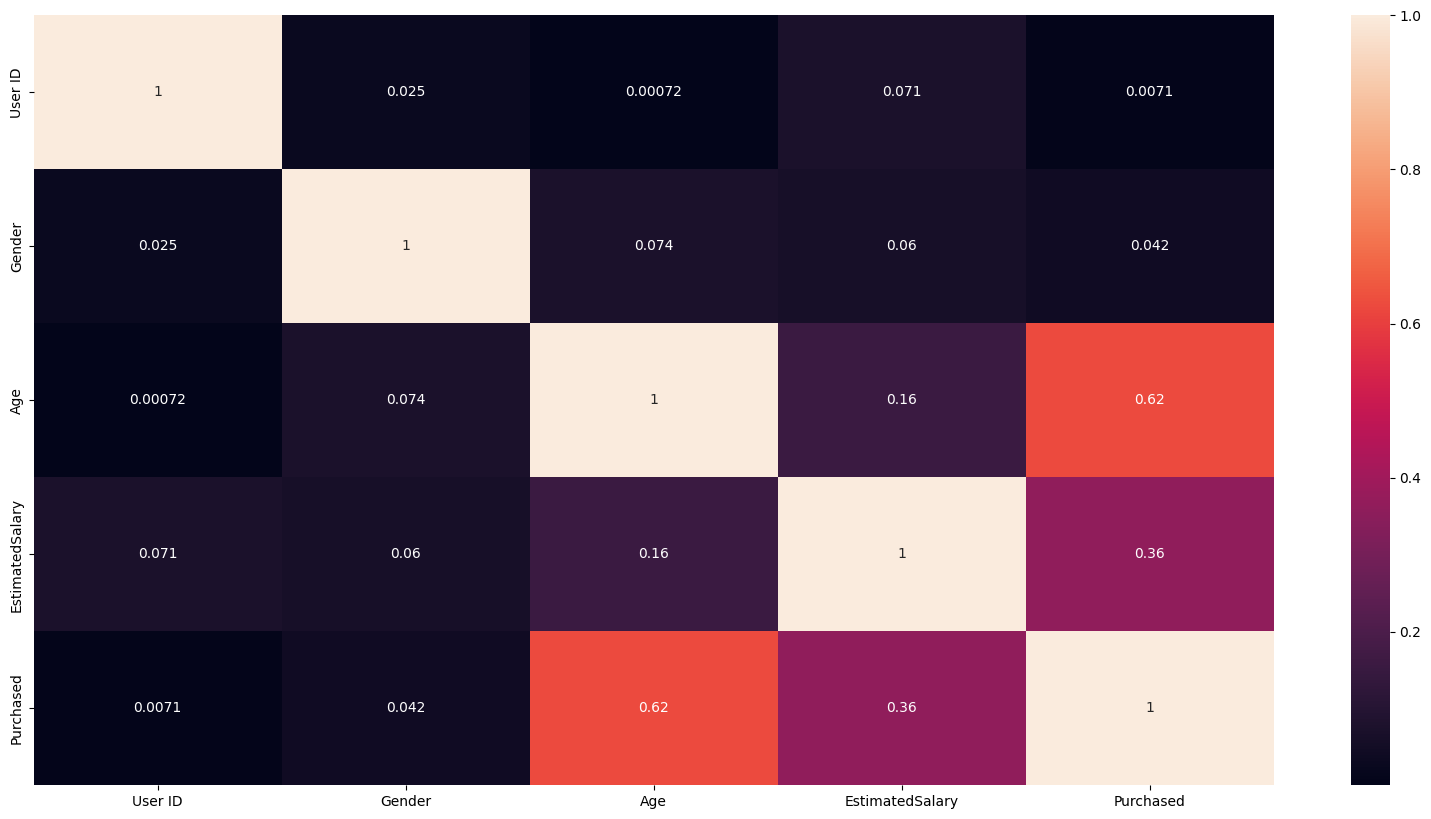

In [26]:
plt.figure(figsize = (20, 10))
sns.heatmap(correlation, annot=True)
plt.plot()

In [28]:
##we can see age and estimatedSalary are highly correlated to purchased so we take X as age and estimatedSalary and Y as purchased
X = df[['Age', 'EstimatedSalary']]
Y = df['Purchased']

In [29]:
print(X)

     Age  EstimatedSalary
0     19            19000
1     35            20000
2     26            43000
3     27            57000
4     19            76000
..   ...              ...
395   46            41000
396   51            23000
397   50            20000
398   36            33000
399   49            36000

[400 rows x 2 columns]


In [30]:
print(Y)

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64


In [31]:
##time to split data to training and testing set
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=False)

In [49]:
##scaling values for better results
##using standard scaler to scale x_train and x_test

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [50]:
print(x_train)
print(x_test)
print(y_train)
print(y_test)

[[-1.35429864 -1.48144728]
 [ 0.42101023  2.33810598]
 [ 0.81552331  0.7809035 ]
 [-0.95978556 -0.30620012]
 [ 0.12512542  0.7809035 ]
 [-0.95978556  0.57523525]
 [ 0.32238196  0.0757552 ]
 [ 0.71689504 -1.27577903]
 [-0.46664421 -0.01238833]
 [-1.74881173  0.36956699]
 [-0.66390075  0.13451756]
 [ 0.42101023  0.31080464]
 [-0.26938767  0.0757552 ]
 [-0.46664421  2.33810598]
 [ 0.22375369  0.04637403]
 [ 1.30866467  2.24996245]
 [ 0.81552331  0.28142346]
 [-0.26938767  0.16389874]
 [ 0.02649715 -0.54124955]
 [-0.17075939  0.16389874]
 [-0.07213112  0.25204228]
 [ 0.02649715 -0.24743776]
 [ 2.19631911  1.13347765]
 [-1.74881173  0.36956699]
 [ 1.90043429  0.13451756]
 [ 0.42101023 -0.12991305]
 [-1.1570421   0.31080464]
 [ 0.81552331  1.39790826]
 [-0.26938767 -0.24743776]
 [-1.65018346 -0.04176951]
 [-0.95978556 -0.74691781]
 [ 0.32238196  0.51647289]
 [-0.07213112 -1.07011078]
 [-1.05841383  0.60461643]
 [ 0.12512542 -0.80568017]
 [-0.95978556  1.57419533]
 [-0.66390075  1.42728944]
 

In [41]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()

In [42]:
logistic_model.fit(x_train, y_train)

LogisticRegression()

In [51]:
y_pred = logistic_model.predict(x_test)

In [45]:
print(y_test, y_pred)

132    0
309    0
341    0
196    0
246    0
      ..
252    1
350    1
168    1
150    0
393    1
Name: Purchased, Length: 132, dtype: int64 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [46]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [53]:
logistic_model.score(x_test, y_test)

0.8712121212121212

In [55]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[79  5]
 [12 36]]


In [56]:
tp = cm[0][0]
fn = cm[0][1]
tn = cm[1][1]
fp = cm[1][0]
total = tp+fn+tn+fp

In [57]:
accuracy = tp+tn/total
error_rate = fp+fn/total
recall = tp/tp+fn
precision = tp/tp+fp

In [61]:
print(accuracy)
print(error_rate)
print(recall)
print(precision)

79.27272727272727
12.037878787878787
6.0
13.0


In [62]:
class_repo = classification_report(y_test, y_pred)
print(class_repo)

              precision    recall  f1-score   support

           0       0.87      0.94      0.90        84
           1       0.88      0.75      0.81        48

    accuracy                           0.87       132
   macro avg       0.87      0.85      0.86       132
weighted avg       0.87      0.87      0.87       132

